In [1]:
#Name: Domala Vamshikrishna
#Date:15-04-2022
#Model:Ridge Regression
#station:41047
#Hyperparameter tuning using Randomsearch
#Wave height Prediction

In [2]:
import csv
import numpy as np
import folium
import pandas as pd
import math
from matplotlib import pyplot as plt

In [3]:
#sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
#min_samples_split: Defines the minimum no. of samples which are required in a node to be considered for splitting

#min_samples_leaf: Defines the minimum samples required in a terminal node or leaf

#min_weight_leaf: Similar to min_samples_leaf but defined as a fraction
#of the total number of observations instead of an integer.
#Only one of #2 and #3 should be defined.

#max_depth: The maximum depth of a tree. Should be tuned using CV.

#max_leaf_nodes: The maximum number of terminal nodes or leaves in a tree.
#If this is defined, GBM will ignore max_depth.

#max_features:
#The number of features to consider while searching for a best split. These will be randomly selected.
#As a thumb-rule, square root of the total number of features works great but we should check upto 
#30-40% of the total number of features.
#Higher values can lead to over-fitting but depends on case to case


In [4]:
train = pd.read_excel("41047h_Training.xlsx")

In [5]:
train

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
0,2015-01-01 00:50:00,94,1.6,2.3,1.29,7.14,5.89,100,1022.2,23.8,25.4,19.9
1,2015-01-01 01:50:00,168,0.1,0.4,1.22,8.33,5.96,11,1022.4,23.9,25.4,19.6
2,2015-01-01 02:50:00,215,2.3,2.9,1.44,8.33,6.38,355,1022.2,23.7,25.4,20.0
3,2015-01-01 03:50:00,294,2.9,3.7,1.58,8.33,6.51,12,1022.3,23.8,25.4,19.0
4,2015-01-01 04:50:00,349,7.8,8.9,1.65,9.09,6.77,349,1021.9,21.9,25.3,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2019-12-31 19:40:00,227,5.1,6.8,1.13,13.79,5.41,42,1015.6,23.7,23.6,18.3
43820,2019-12-31 20:40:00,229,4.2,5.1,1.14,14.81,5.45,79,1015.8,23.7,23.5,18.3
43821,2019-12-31 21:40:00,210,5.0,5.9,1.16,13.79,5.49,88,1015.8,23.7,23.5,18.3
43822,2019-12-31 22:40:00,204,5.2,6.4,1.14,14.81,5.41,92,1015.8,23.7,23.5,18.3


In [6]:
corr=train.corr(method='pearson')
corr

,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
WDIR_deg,1.000000,-0.083495,-0.071898,-0.028022,-0.019392,0.001630,0.289847,-0.303824,0.009257,-0.029264,0.008476
WSPD_m/s,-0.083495,1.000000,0.987837,0.622174,0.005358,-0.066718,0.076161,-0.147054,-0.253535,-0.263866,-0.101170
GST_m/s,-0.071898,0.987837,1.000000,0.669209,0.035750,-0.008218,0.083799,-0.156283,-0.269234,-0.261829,-0.106855
WVHT_m,-0.028022,0.622174,0.669209,1.000000,0.399958,0.618020,0.052864,-0.199379,-0.345457,-0.296086,-0.216701
DPD_sec,-0.019392,0.005358,0.035750,0.399958,1.000000,0.677538,-0.246300,-0.059495,-0.166430,-0.136618,-0.189492
APD_sec,0.001630,-0.066718,-0.008218,0.618020,0.677538,1.000000,-0.117475,-0.091748,-0.223729,-0.157230,-0.223914
MWD_deg,0.289847,0.076161,0.083799,0.052864,-0.246300,-0.117475,1.000000,-0.122268,-0.019170,-0.014749,-0.012126
PRES_hpa,-0.303824,-0.147054,-0.156283,-0.199379,-0.059495,-0.091748,-0.122268,1.000000,-0.196204,-0.159511,-0.080103
ATMP_deg,0.009257,-0.253535,-0.269234,-0.345457,-0.166430,-0.223729,-0.019170,-0.196204,1.000000,0.919570,0.626586
WTMP_deg,-0.029264,-0.263866,-0.261829,-0.296086,-0.136618,-0.157230,-0.014749,-0.159511,0.919570,1.000000,0.560544


In [7]:
corr.to_excel('41047_Pearson_corelation.xlsx')

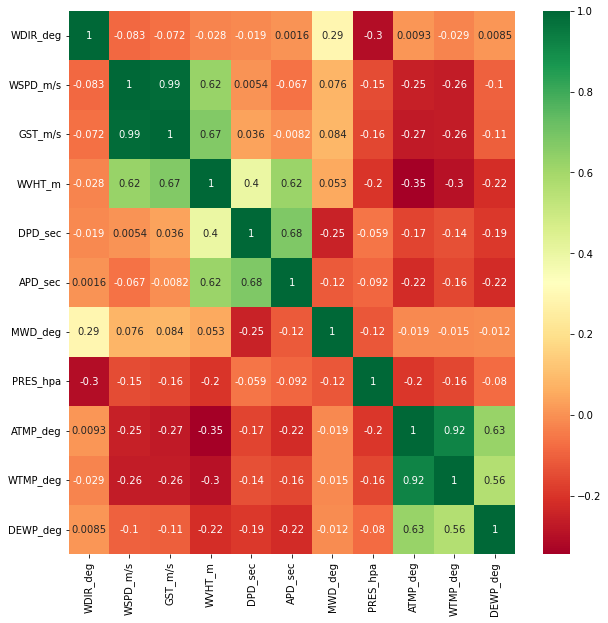

In [8]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:>

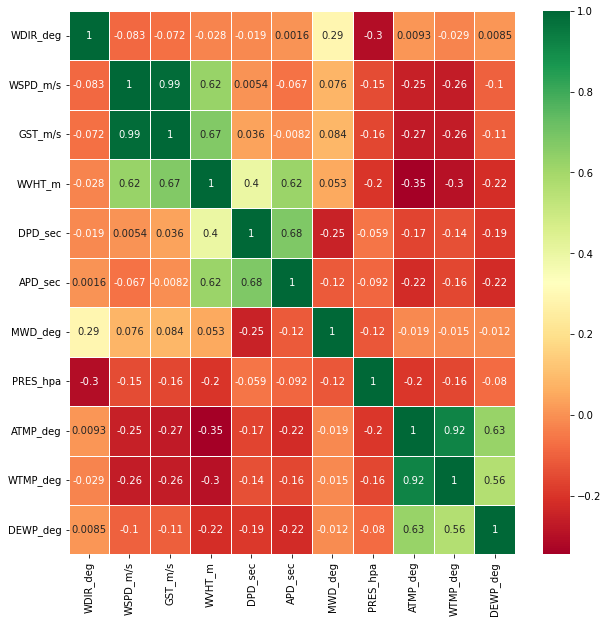

In [9]:

plt.figure(figsize=(10,10))
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,cmap='RdYlGn', annot=True, linewidth=0.5)

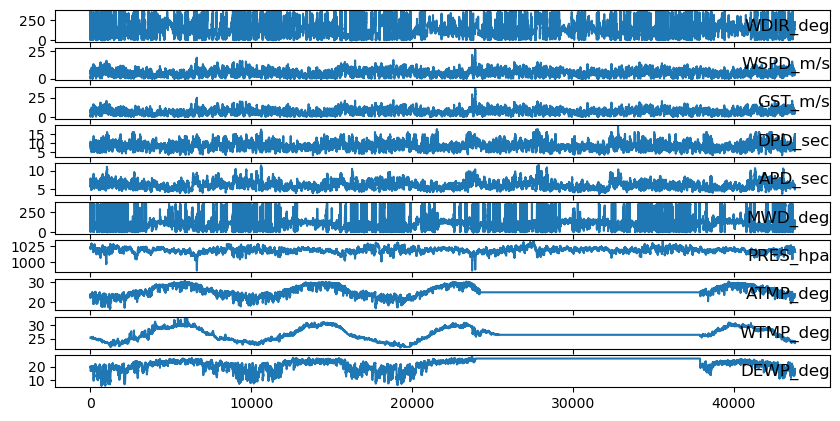

In [10]:
values = train.values
# specify columns to plot
groups = [ 1, 2, 3, 5, 6, 7, 8, 9, 10, 11]
i = 1
# plot each column
plt.figure(figsize=(10, 5), dpi=100)
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(train.columns[group], y=0.1, loc='right')
	i += 1
plt.show()

In [11]:
train.head()

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
0,2015-01-01 00:50:00,94,1.6,2.3,1.29,7.14,5.89,100,1022.2,23.8,25.4,19.9
1,2015-01-01 01:50:00,168,0.1,0.4,1.22,8.33,5.96,11,1022.4,23.9,25.4,19.6
2,2015-01-01 02:50:00,215,2.3,2.9,1.44,8.33,6.38,355,1022.2,23.7,25.4,20.0
3,2015-01-01 03:50:00,294,2.9,3.7,1.58,8.33,6.51,12,1022.3,23.8,25.4,19.0
4,2015-01-01 04:50:00,349,7.8,8.9,1.65,9.09,6.77,349,1021.9,21.9,25.3,19.6


In [12]:
Xtrain = train.iloc[:,[1,2,3,5,6,7]]
ytrain = train.iloc[:,4]

In [13]:
"""import matplotlib.pyplot as plt
for i in range(5):
    plt.hist(Xtrain[:,i], edgecolor='black')
    plt.title(features[i])
    plt.show()"""


"import matplotlib.pyplot as plt\nfor i in range(5):\n    plt.hist(Xtrain[:,i], edgecolor='black')\n    plt.title(features[i])\n    plt.show()"

In [14]:
from sklearn.kernel_ridge import KernelRidge
krid=KernelRidge()


In [16]:
from sklearn.model_selection import RandomizedSearchCV
random_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],"gamma": np.logspace(-2, 2, 5)}
#random_grid=[{'kernel': ['rbf'],'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
             # 'alpha': [100, 10, 0.1,0.01,0.001,0.0001],'degree':[2,3] }]
#random_grid=[{'kernel': ['linear'],'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5, 0.6, 0.9],
              #'alpha': [100, 10, 0.1,0.01,0.001,0.0001],'degree':[2,3] }]

In [17]:
random_search=RandomizedSearchCV(krid, random_grid, cv=5, n_jobs=4)


In [18]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [19]:
from datetime import datetime

start_time = timer(None) # timing starts from this point 
random_search=random_search.fit(Xtrain,ytrain.ravel())
timer(start_time) # timing ends here 

C:\Users\Domala\.conda\envs\Ensemble_learn\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
47 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
37 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Domala\.conda\envs\Ensemble_learn\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Domala\.conda\envs\Ensemble_learn\lib\site-packages\sklearn\kernel_ridge.py", line 206, in fit
    self.dual_coef_ = _solve_cholesky_kernel(K, y, alpha, sample_weight, copy)
  File "C:\Users\Domala\.conda\envs\Ensemble_learn\lib\site-packages\sklearn\linear


 Time taken: 0 hours 56 minutes and 13.94 seconds.


In [20]:

random_search.best_params_

{'gamma': 0.01, 'alpha': 0.001}

In [21]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [22]:
#display(random_search)

In [23]:
random_search.best_estimator_

KernelRidge(alpha=0.001, gamma=0.01)

In [24]:

greg=KernelRidge(alpha=0.001, degree=2, gamma=0.001, kernel='rbf')
greg.fit(Xtrain,ytrain)

#previous fit parameters
#greg=gtb(learning_rate=0.01, max_depth=5, max_features=0.9,min_samples_leaf=2, min_samples_split=4,n_estimators=1000)
#greg.fit(Xtrain,ytrain)

KernelRidge(alpha=0.001, degree=2, gamma=0.001, kernel='rbf')

In [25]:
y_pred = greg.predict(Xtrain)

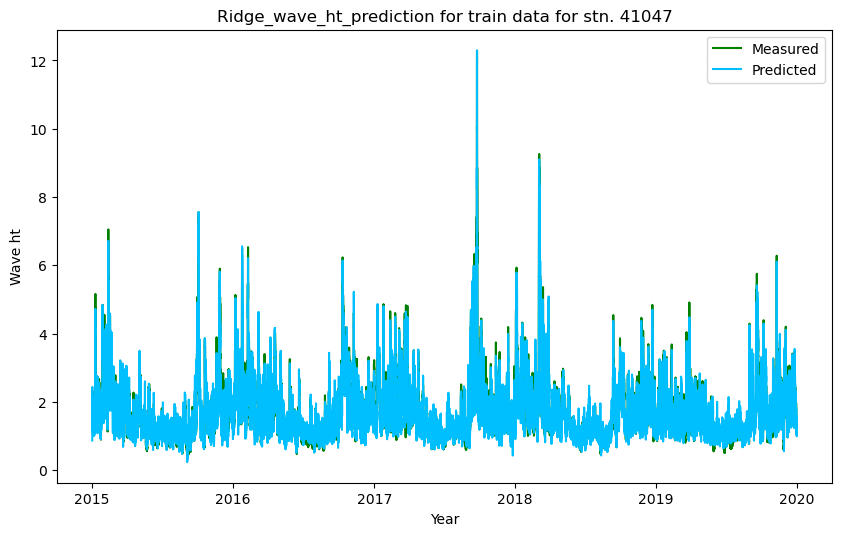

In [26]:
fig = plt.figure(figsize=(10, 6), dpi=100)
plt.plot(train['Date'], ytrain.ravel(), label='Measured', color='green')
plt.plot(train['Date'],y_pred, label='Predicted', color='deepskyblue')
#plt.plot(y_pred, color='green', label='predicted')
plt.title('Ridge_wave_ht_prediction for train data for stn. 41047')
plt.xlabel('Year')
plt.ylabel('Wave ht')
plt.legend(loc='upper right')

In [27]:
from sklearn.metrics import r2_score
r2_score(ytrain,y_pred)

0.9256424908331472

In [28]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytrain,y_pred))

0.23113814983703374

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytrain,y_pred)

0.11909913133326207

In [30]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytrain,y_pred)

0.17031366455080613

In [31]:
test=pd.read_excel("41047h_Testing.xlsx")

In [32]:
test

,Date,WDIR_deg,WSPD_m/s,GST_m/s,WVHT_m,DPD_sec,APD_sec,MWD_deg,PRES_hpa,ATMP_deg,WTMP_deg,DEWP_deg
0,2020-01-01 00:40:00,193,8.1,9.7,1.18,8.33,5.16,134,1015.5,23.7,23.4,18.3
1,2020-01-01 01:40:00,250,7.8,9.8,1.20,7.69,4.83,142,1016.5,23.7,23.4,18.3
2,2020-01-01 02:40:00,5,1.0,2.4,1.17,7.69,4.95,137,1016.6,23.7,23.4,18.3
3,2020-01-01 03:40:00,254,4.6,5.5,1.19,14.81,4.99,74,1016.2,23.7,23.4,18.3
4,2020-01-01 04:40:00,218,4.6,5.6,1.18,4.17,4.86,261,1015.7,23.7,23.4,18.3
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2020-12-31 19:40:00,193,7.1,9.5,2.21,7.69,6.35,84,1024.9,22.8,22.8,14.4
8780,2020-12-31 20:40:00,193,7.2,9.5,2.17,11.43,6.48,82,1025.5,22.8,22.8,14.2
8781,2020-12-31 21:40:00,193,7.5,9.2,2.04,9.09,6.17,41,1025.7,22.8,22.8,14.2
8782,2020-12-31 22:40:00,193,7.5,10.1,2.06,7.14,6.25,92,1025.8,22.9,22.8,14.1


In [33]:
Xtest=test.iloc[:,[1,2,3,5,6,7]]

In [34]:
Xtest

,WDIR_deg,WSPD_m/s,GST_m/s,DPD_sec,APD_sec,MWD_deg
0,193,8.1,9.7,8.33,5.16,134
1,250,7.8,9.8,7.69,4.83,142
2,5,1.0,2.4,7.69,4.95,137
3,254,4.6,5.5,14.81,4.99,74
4,218,4.6,5.6,4.17,4.86,261
...,...,...,...,...,...,...
8779,193,7.1,9.5,7.69,6.35,84
8780,193,7.2,9.5,11.43,6.48,82
8781,193,7.5,9.2,9.09,6.17,41
8782,193,7.5,10.1,7.14,6.25,92


In [35]:
ytest=test.iloc[:,[4]]

In [36]:
ytest

,WVHT_m
0,1.18
1,1.20
2,1.17
3,1.19
4,1.18
...,...
8779,2.21
8780,2.17
8781,2.04
8782,2.06


In [37]:
ytest_pred=greg.predict(Xtest)

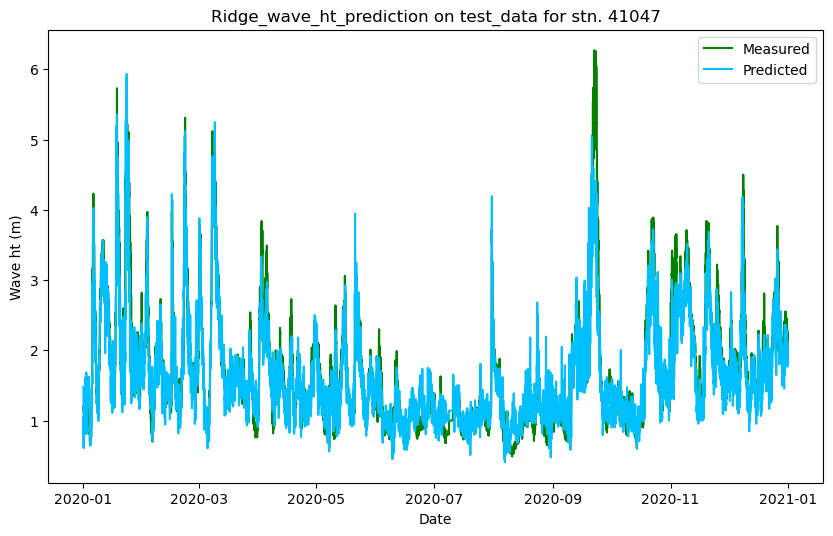

In [44]:
fig = plt.figure(figsize=(10, 6), dpi=100)
plt.plot(test['Date'], ytest, label='Measured', color='green')
plt.plot(test['Date'],ytest_pred, label='Predicted', color='deepskyblue')

#plt.plot(y_pred, color='green', label='predicted')
plt.title('Ridge_wave_ht_prediction on test_data for stn. 41047')
plt.xlabel('Date')
plt.ylabel('Wave ht (m)')
plt.legend(loc='upper right')

In [45]:
from sklearn.metrics import r2_score
r2_score(ytest,ytest_pred)

0.8641697965954663

In [46]:
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest,ytest_pred)

0.09784282205617956

In [47]:
math.sqrt(mean_squared_error(ytest,ytest_pred))

0.3127983728477173

In [48]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(ytest,ytest_pred)

0.13876532935899877

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ytest_pred)

0.21625257909444967

In [31]:
ytest_pred=pd.DataFrame(ytest_pred)

In [32]:
ytest_pred

,0
0,1.428338
1,1.339945
2,0.850127
3,0.923617
4,0.992987
...,...
8779,2.239897
8780,2.011679
8781,1.833740
8782,2.244911


In [34]:
ytest_pred.to_excel("Wave_ht_GB_41047.xlsx")

In [49]:
df1=pd.read_excel("ytest_pred_gb_ran_search.xlsx")

In [50]:
df1

,Date,ytest_pred
0,2020-01-01 00:40:00,1.402747
1,2020-01-01 01:40:00,1.312154
2,2020-01-01 02:40:00,0.970782
3,2020-01-01 03:40:00,0.799396
4,2020-01-01 04:40:00,1.164588
...,...,...
8779,2020-12-31 19:40:00,2.195354
8780,2020-12-31 20:40:00,1.992086
8781,2020-12-31 21:40:00,1.984485
8782,2020-12-31 22:40:00,2.212198
